# Airline On-Time Statistics and Delay Causes Data Exploration
## by Fatma Urek Uludag

## Investigation Overview

My main interest is to find delay count and duration differences in terms of airlines, airports and seasons. Also I am hoping to find out the differences between first 3 months of 2019 and 2020 in order to see effects of Covid-19 Pandemic on USA domestic flights.

## Dataset Overview

Dataset contains the count of arrived flights, delayed flights split by causes, cancelled flights and deprived flights at month and delay durations split by causes, airport and carrier granularity. Time window of data us from Jan 2019 to March 2020.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# initalise a base color
base_color = sb.color_palette()[0]

In [3]:
# load in the clean dataset into a pandas dataframe
df_flight_cp = pd.read_csv("cleaned_flight_data.csv")
df_flight_cp.head(3)

,Unnamed: 0,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year_month
0,0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,...,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0,2019/01
1,1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,...,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0,2019/01
2,2,2019,1,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,...,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0,2019/01


## Broad Look into Figures

Broad look into the distribution of flight counts and delays by reason.

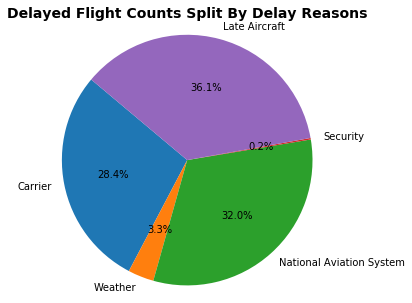

In [11]:
# now let's check relative frequencies of different reasons of delay
labels ='Carrier', 'Weather', 'National Aviation System', 'Security', 'Late Aircraft'
total_count = [df_flight_cp.carrier_ct.sum(), df_flight_cp.weather_ct.sum(), 
               df_flight_cp.nas_ct.sum(), df_flight_cp.security_ct.sum(),
               df_flight_cp.late_aircraft_ct.sum()]

plt.figure(figsize = [5, 5])
plt.pie(total_count, labels=labels, startangle=140, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Delayed Flight Counts Split by Delay Reasons'.title(), fontsize = 14, weight = "bold")
plt.show()

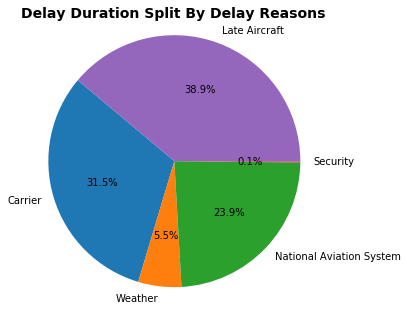

In [12]:
# "late_aircraft" is the biggest reason of delays with the ratio of 36.1%
# now let's see duration of delays by compared to reasons, 
# in order to see if there is corrolation between delay count vs duration in terms of reason
labels ='Carrier', 'Weather', 'National Aviation System', 'Security', 'Late Aircraft'
total_time = [df_flight_cp.carrier_delay.sum(), df_flight_cp.weather_delay.sum(), 
               df_flight_cp.nas_delay.sum(), df_flight_cp.security_delay.sum(),
               df_flight_cp.late_aircraft_delay.sum()]

plt.figure(figsize = [5, 5])
plt.pie(total_time, labels=labels, startangle=140, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Delay Duration Split by Delay Reasons'.title(), fontsize = 14, weight = "bold")
plt.show()

## Monthly Distribution of Delayed Flights

Looking into monthly split of data, in order to observe Covid-19 impact.

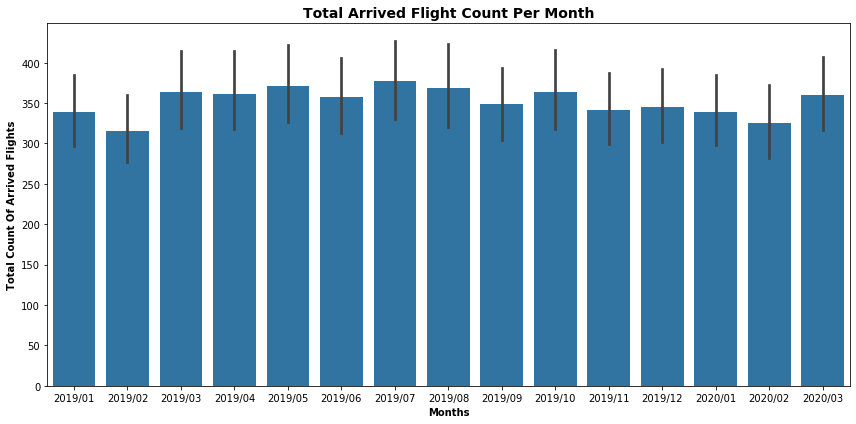

In [14]:
# now let's see the arrived flight bar graph per month
plt.figure(figsize = [12, 6])
ax = sb.barplot(data = df_flight_cp.sort_values(by=['year_month'], ascending=True), 
                x = 'year_month', y="arr_flights", color = base_color)
ax.set_xlabel('Months'.title(), fontsize = 10, weight = "bold")
ax.set_ylabel('Total count of Arrived Flights'.title(), fontsize = 10, weight = "bold")
ax.set_title('Total Arrived Flight Count per Month'.title(), fontsize = 14, weight = "bold")
plt.tight_layout()
plt.show()

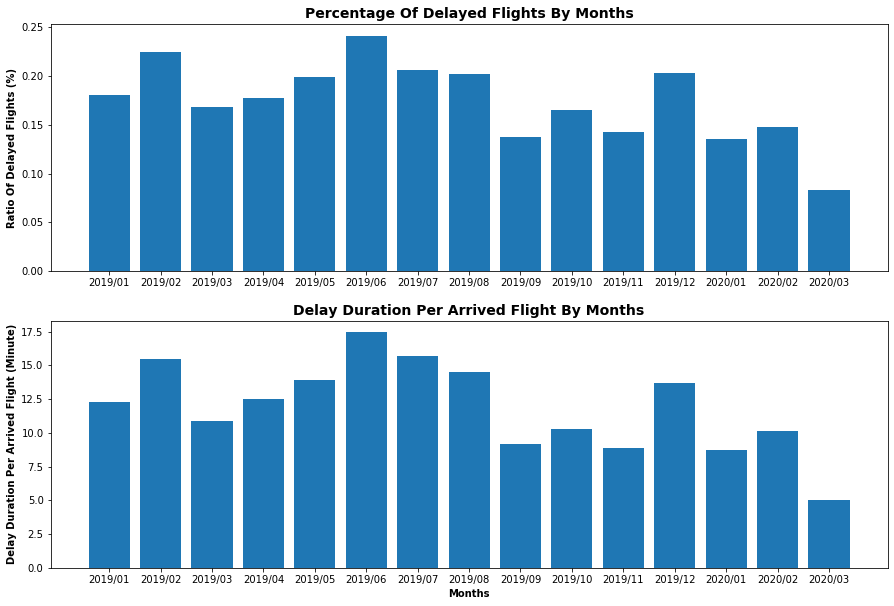

In [15]:
# now let's look at the same figures for months
# grouping flight data by month by summing up necessary fields
df_month_sum = df_flight_cp.groupby(['year_month'])['arr_flights', 'arr_del15', 'arr_delay'].sum() #.reset_index()
df_month_sum.sort_values(by=['year_month'], ascending=True, inplace=True)

# grid view for two similar graphs
plt.figure(figsize = [15, 10])

plt.subplot(2, 1, 1) 
plt.bar(df_month_sum.index, (df_month_sum.arr_del15 / df_month_sum.arr_flights));
plt.ylabel('Ratio of Delayed Flights (%)'.title(), fontsize = 10, weight = "bold")
plt.title('Percentage of Delayed Flights by Months'.title(), fontsize = 14, weight = "bold")

plt.subplot(2, 1, 2) 
plt.bar(df_month_sum.index, (df_month_sum.arr_delay / df_month_sum.arr_flights));
plt.ylabel('Delay Duration per Arrived Flight (minute)'.title(), fontsize = 10, weight = "bold")
plt.xlabel('Months'.title(), fontsize = 10, weight = "bold")
plt.title('Delay Duration per Arrived Flight by Months'.title(), fontsize = 14, weight = "bold")

plt.show()

## Delay Reasons in Months

Delay count and duration has decrased significantly in March 2020 whereas total arrived flight count stays same. Further investigation is necessary for delay reasons.


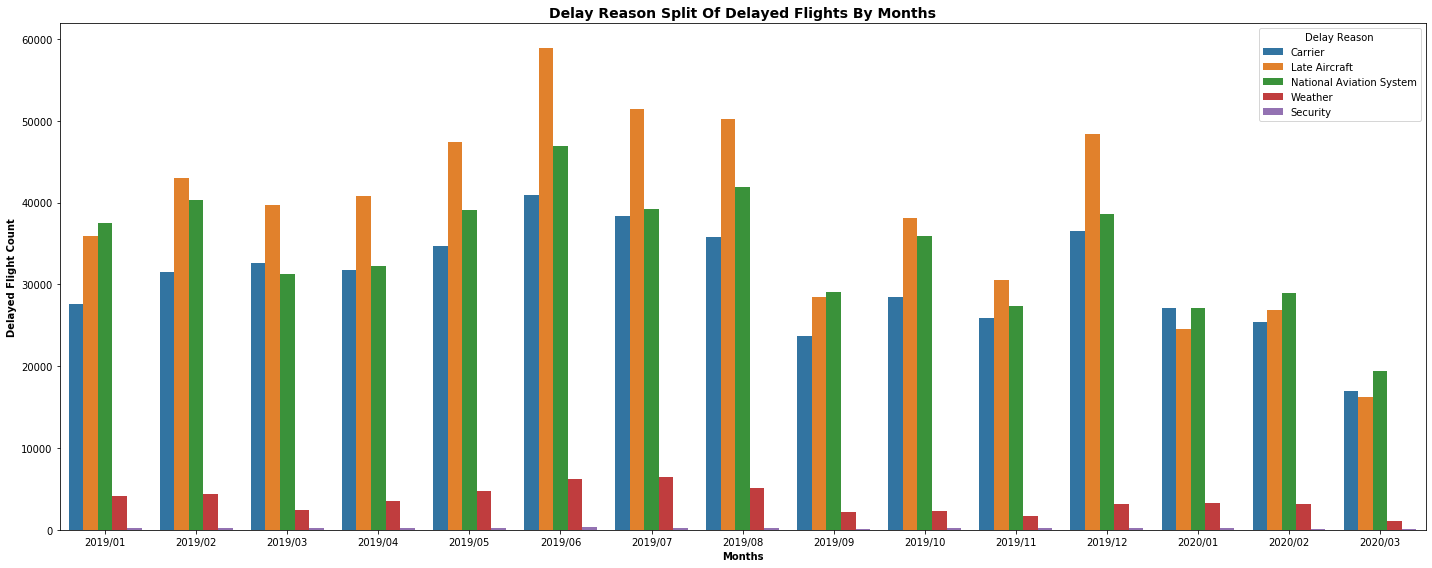

In [16]:
# so maybe the reason of decrease hides behind the delay reasons?
tmp_df = df_flight_cp.groupby(['year_month'], as_index=False).agg({'carrier_ct': "sum", 'late_aircraft_ct': "sum",
                                                                   'nas_ct': "sum", 'weather_ct': "sum",
                                                                   'security_ct': "sum"})

tmp_df = pd.melt(tmp_df, id_vars=['year_month'], value_vars=['carrier_ct', 'late_aircraft_ct', 'nas_ct', 
                                                             'weather_ct', 'security_ct'])

plt.figure(figsize=(20,8))
ax = sb.barplot(data = tmp_df, x = 'year_month', y = 'value', hue = 'variable')
ax.set_xlabel('Months'.title(), fontsize = 10, weight = "bold")
ax.set_ylabel('Delayed Flight Count'.title(), fontsize = 10, weight = "bold")
ax.set_title('Delay Reason Split of Delayed Flights by Months'.title(), fontsize = 14, weight = "bold")
handles, labels = ax.get_legend_handles_labels()
labels = ["Carrier", "Late Aircraft", "National Aviation System", "Weather", "Security"]
ax.legend(handles, labels, title='Delay Reason')
plt.tight_layout()
plt.show()

## Conclusion

There is no direct reasoning for the decrease in delayed flights count at March '20 found in the dataset. However, according to external sources, USA banned international flights starting from the beginning of March '20. Dramatic decrease in international flights might have had prositive impacts on flight planning, aircraft latencies and maintenance, which could have ended up in a significant decrease in delays at domestic flights.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!